<a href="https://colab.research.google.com/github/SifouaneLyna/AI-homework1/blob/main/ai_homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import os

# Task 1 : merging 12 months of sales data into a single file

In [6]:
df = pd.read_csv("SalesAnalysis/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('SalesAnalysis/Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv("SalesAnalysis/Sales_Data/"+file) #we put each file in the variable df
  all_months_data = pd.concat([all_months_data, df]) #we concatinate everything in all_months_data

all_months_data.to_csv("all_data.csv" , index=False)

read in updated dataframe

In [8]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean up the data

Drop rows of NAN

In [9]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Find 'Or' and delete it

In [10]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


convert columns to the correct type

In [11]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # make float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Augment data with additionnal columns

# Task 2 : Add Month Column

In [12]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Task 3 : add a sales column

In [13]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Task 4 : add a city column

In [14]:
# la methode .apply() lets us run any function on our data frame

#we could also just do:
#all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])


def get_city(Address):
  return Address.split(',')[1]

def get_state(Address):
  return Address.split(',')[2].split(' ')[1]

# we can do this
#all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) +' ('+ get_state(x)+') ')

#or this with f""
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

# x is one cell in that column , for each x content , we split it by "," , then we select the index 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


# Question 1 : what was the best month for sales? how much was earned this month?

In [15]:
results = all_data.groupby('Month').sum()

<ipython-input-15-d9e765394c87>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


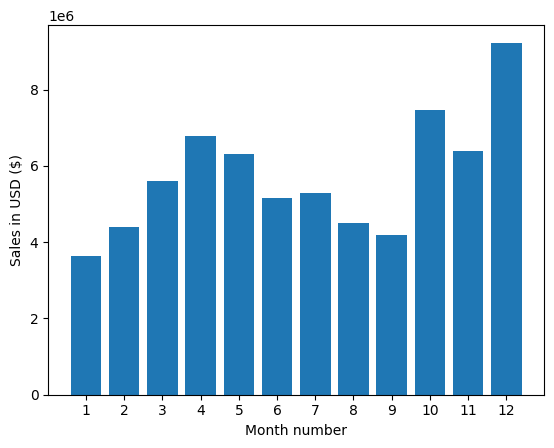

In [16]:
import matplotlib.pyplot as plt

months = range(1,13) #13 is exclusive so from 1 to 12

plt.bar(months, results['Sales']) # (x,y)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')

plt.show()

# Question 2 : what city had the highest number of sales

In [17]:
results = all_data.groupby('City').sum()
results

<ipython-input-17-7385b3f009b8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),33204,5559816.40,209588,5590997.16
Austin (TX),22306,3619747.22,139658,3639163.50
Boston (MA),45056,7274819.54,282224,7323284.02
Dallas (TX),33460,5505255.64,209240,5535950.80
Los Angeles (CA),66578,10842870.46,416650,10905141.60
New York City (NY),55864,9270741.66,351482,9328634.86
Portland (ME),5500,894378.50,34288,899516.54
Portland (OR),22606,3721116.44,141242,3741464.68
San Francisco (CA),100478,16422923.48,631040,16524407.82


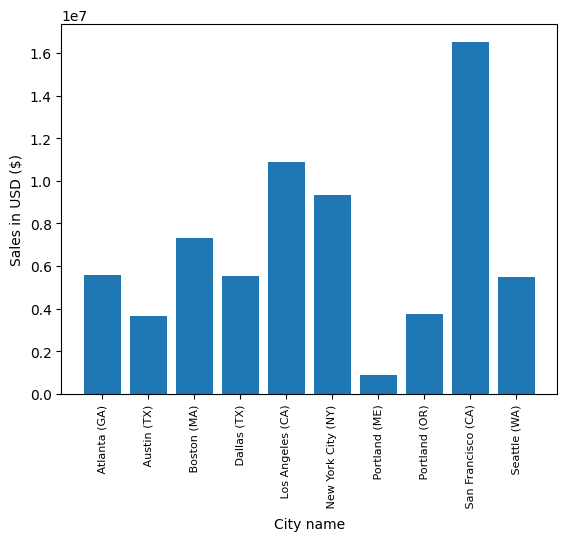

In [18]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]  #will get the cities in the same order when we did the groupby

plt.bar(cities, results['Sales']) # (x,y)
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')

plt.show()

# Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [21]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])  #fixed the date and time format so we can work with it

In [22]:
all_data['Hour'] = all_data['Order Date'].dt.hour  #extracting hours
all_data['Minute'] = all_data['Order Date'].dt.minute  #extracting minutes

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


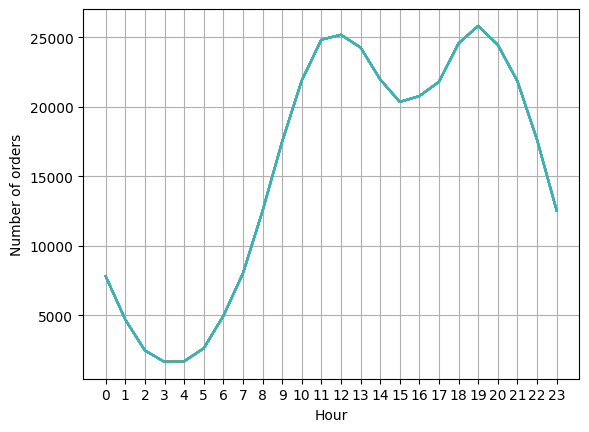

In [23]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count()) #number of orders for each hour

plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()

plt.show()

#recommendation is 11am or 7pm

# Question 4: What products are most often sold together?

In [25]:
#same order id means the products were sold together

df = all_data[all_data['Order ID'].duplicated(keep=False)]

#on affiche les produits qui on le meme order ID dans la meme colonne 'grouped'
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

#pour ne pas avoir des duplicates
df = df[['Order ID','Grouped']].drop_duplicates()

df.head(100)


,Order ID,Grouped
0,176558,"USB-C Charging Cable,USB-C Charging Cable"
2,176559,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,"Wired Headphones,Wired Headphones"
6,176562,"USB-C Charging Cable,USB-C Charging Cable"
...,...,...
100,176653,"AA Batteries (4-pack),AA Batteries (4-pack)"
101,176654,"USB-C Charging Cable,USB-C Charging Cable"
102,176655,"Apple Airpods Headphones,Apple Airpods Headphones"
103,176656,"Google Phone,Google Phone"


In [27]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 3)))  #most commun 3 in a row

for key, value in count.most_common(10):
  print(key,value)

('Lightning Charging Cable', 'iPhone', 'Lightning Charging Cable') 1021
('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 1020
('iPhone', 'Lightning Charging Cable', 'iPhone') 1019
('iPhone', 'iPhone', 'Lightning Charging Cable') 1007
('USB-C Charging Cable', 'Google Phone', 'USB-C Charging Cable') 1003
('Google Phone', 'USB-C Charging Cable', 'Google Phone') 999
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 997
('Google Phone', 'Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones', 'iPhone') 462
('Wired Headphones', 'iPhone', 'Wired Headphones') 462


# Question 5 : What product sold the most? Why do you think it sold the most?

<ipython-input-31-b6a163be4a94>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


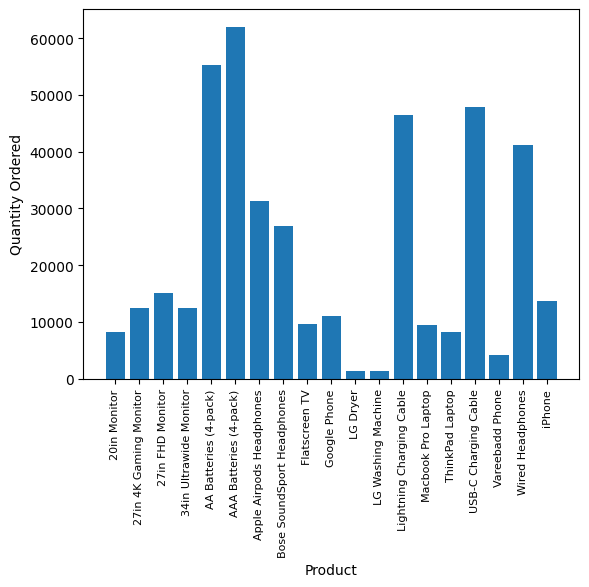

In [31]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation= 'vertical', size=8)
plt.show()

<ipython-input-34-0fa110c18bab>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
<ipython-input-34-0fa110c18bab>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


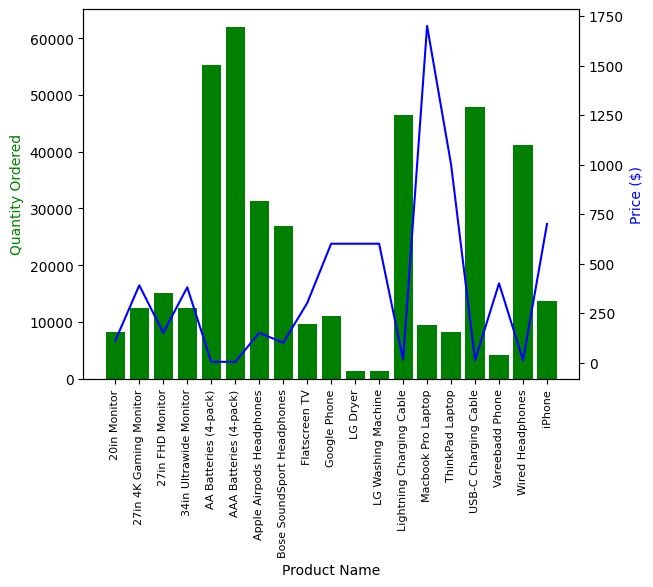

In [34]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()